### Objective is to classify whether the tumor malignant or benign (M -malignantor ,B - benign)
- Dataset : https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('breastcancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
data.drop(columns= ['id','Unnamed: 32'], axis = 1 , inplace = True)
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


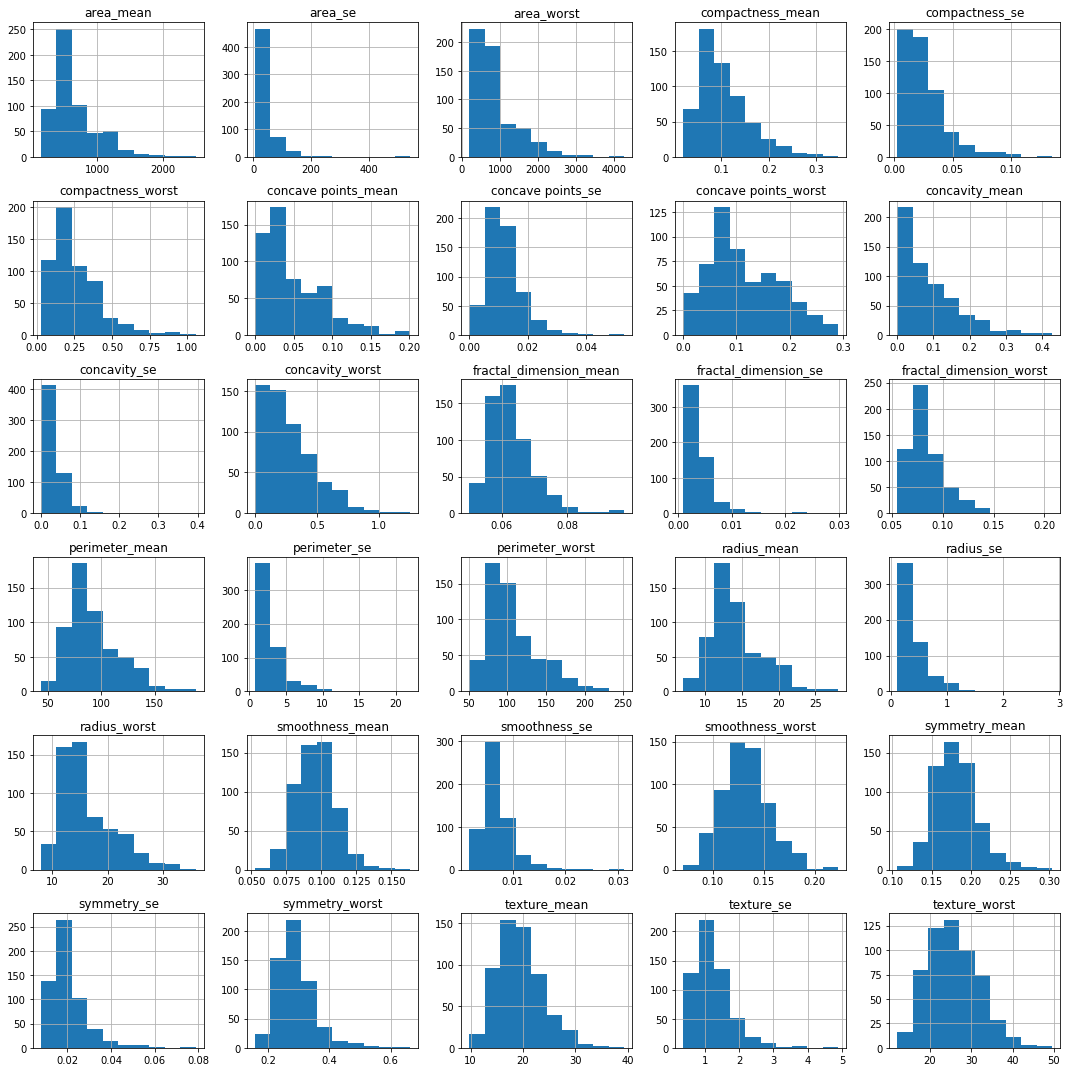

In [7]:
data.select_dtypes(include= np.float).hist(figsize = (15,15))
plt.tight_layout()
plt.show()

In [8]:
# sns.pairplot(data.select_dtypes(include= np.float))
# plt.tight_layout()
# plt.show()

In [9]:
# sns.pairplot(data, hue = 'diagnosis')
# plt.tight_layout()
# plt.show()

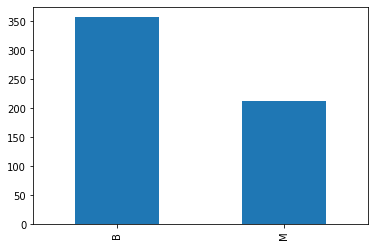

In [10]:
# minority over sampling, majority over sampling, smote and rose
data['diagnosis'].value_counts().plot(kind = 'bar')
plt.show()

In [11]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [12]:
data['diagnosis'] = data['diagnosis'].apply(lambda x : 1 if x == 'M' else 0)
data['diagnosis'].unique()

array([1, 0], dtype=int64)

In [13]:
X = data.iloc[:,1:].values
y = data.iloc[:, 0].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
classication_lr = LogisticRegression()
classication_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
print('training score : {}, test score : {}'.format(classication_lr.score(X_train, y_train), classication_lr.score(X_test, y_test)))


training score : 0.9882629107981221, test score : 0.986013986013986


In [19]:
y_pred_lr = classication_lr.predict(X_test)


In [20]:
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score
cm_lr = confusion_matrix(y_test, y_pred_lr)
print('logistic reg: {}'.format(cm_lr), '\n')
print(recall_score(y_test, y_pred_lr))

logistic reg: [[86  0]
 [ 2 55]] 

0.9649122807017544


In [21]:
print('---------- logistic reg', '\n')
print(classification_report(y_test, y_pred_lr),'\n')

---------- logistic reg 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        86
           1       1.00      0.96      0.98        57

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143
 



In [22]:
 classication_lr.predict_proba(X_test)[:, 1]

array([5.30738487e-04, 2.73903892e-01, 9.99999948e-01, 1.10562746e-02,
       9.96201463e-01, 9.99999998e-01, 9.99997013e-01, 3.11911956e-02,
       9.86541284e-04, 1.00000000e+00, 9.99129472e-01, 4.36808782e-04,
       2.88737889e-02, 9.99997908e-01, 1.60097797e-01, 2.64385158e-02,
       3.88008859e-04, 8.73215619e-01, 9.97411146e-01, 1.12854754e-03,
       1.15872363e-02, 1.86535947e-05, 9.73266239e-01, 9.96731105e-01,
       9.99995027e-01, 9.99995147e-01, 9.99766226e-01, 3.09451735e-02,
       4.09236420e-01, 1.12894682e-02, 7.93956646e-01, 6.33572043e-04,
       9.99999982e-01, 5.70272179e-05, 9.95588022e-01, 9.99999836e-01,
       9.99747804e-01, 1.75467808e-02, 9.99194722e-01, 4.59008257e-03,
       9.99999885e-01, 2.81593793e-02, 1.46780122e-05, 9.11458648e-07,
       9.99999309e-01, 1.67587471e-02, 4.54598653e-02, 1.11166563e-02,
       5.54780346e-03, 9.97925119e-01, 5.63147297e-04, 3.26023474e-03,
       9.99923679e-01, 8.02026679e-05, 4.33661949e-03, 9.17840173e-05,
      

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, classication_lr.predict_proba(X_test)[:, 1])
roc_score = roc_auc_score(y_test, y_pred_lr)
roc_score

0.9824561403508771

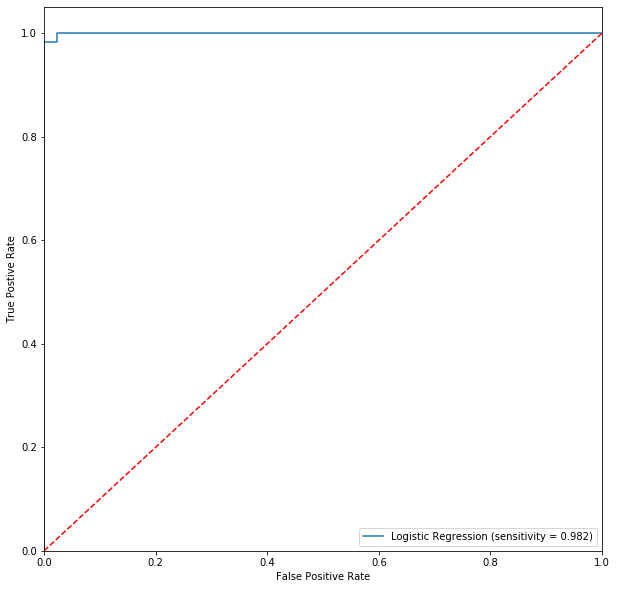

In [24]:
# roc curve
plt.figure(figsize= (10,10))
plt.plot(fpr, tpr, label = 'Logistic Regression (sensitivity = %0.3f)' %roc_score)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate')
plt.legend(loc = 'lower right')
plt.show()

### Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
model_dt.feature_importances_

array([0.        , 0.00760624, 0.        , 0.03810993, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04035936, 0.        , 0.00499399, 0.        , 0.00507082,
       0.        , 0.04629192, 0.        , 0.        , 0.00760624,
       0.        , 0.01009904, 0.        , 0.11238181, 0.        ,
       0.        , 0.02736307, 0.70011759, 0.        , 0.        ])

In [27]:
print(model_dt.score(X_train, y_train))
print(model_dt.score(X_test, y_test))

1.0
0.8951048951048951


In [28]:
y_pred_dt = model_dt.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)

[[76 10]
 [ 5 52]]


In [30]:
pd.crosstab(y_test, y_pred_dt, colnames= ['predicted'], rownames= ['actual'])

predicted,0,1
actual,,
0,76,10
1,5,52


### GridsearchCV

In [31]:
from sklearn.model_selection import GridSearchCV
para_grid = {'criterion' : ['gini', 'entropy'], 'max_depth': list(range(10, 110, 10))}
gs = GridSearchCV(estimator= DecisionTreeClassifier(), param_grid= para_grid, n_jobs= -1, cv = 5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [32]:
gs.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [34]:
gs.best_score_

0.9436388508891929

In [35]:
model_newdt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 40)
model_newdt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=40, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
print(model_newdt.score(X_train, y_train))
print(model_newdt.score(X_test, y_test))

1.0
0.951048951048951


In [37]:
y_pred_newdt = model_newdt.predict(X_test)

In [38]:
# confusion matrix
pd.crosstab(y_test, y_pred_newdt, colnames= ['predicted'], rownames= ['actual'])

predicted,0,1
actual,,
0,82,4
1,3,54


In [39]:
53/57

0.9298245614035088

In [40]:
print(classification_report(y_test, y_pred_newdt))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96        86
           1       0.93      0.95      0.94        57

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



### Randomforest

In [41]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
y_pred_rf = model_rf.predict(X_test)

In [43]:
model_rf.feature_importances_

array([0.03776412, 0.01741041, 0.03965714, 0.03474801, 0.01168253,
       0.01079561, 0.05924053, 0.11089981, 0.00432444, 0.0035064 ,
       0.01376179, 0.00405159, 0.0155426 , 0.03403976, 0.00232296,
       0.00403472, 0.00531748, 0.00439752, 0.00310942, 0.00527258,
       0.10604708, 0.01289739, 0.15406788, 0.08992677, 0.02104988,
       0.00660319, 0.03483184, 0.13675242, 0.00929507, 0.00664909])

In [44]:
# #plot graph of feature importances for better visualization
# feat_importances = pd.Series(model_rf.feature_importances_, index=X_data.columns)
# feat_importances.nlargest(5).plot(kind='barh')
# plt.show()

In [45]:
pd.crosstab(y_test, y_pred_rf, colnames= ['predicted'], rownames= ['actual'])

predicted,0,1
actual,,
0,83,3
1,3,54


In [46]:
from sklearn.model_selection import GridSearchCV
para_grid = {'criterion' : ['gini', 'entropy'], 'max_depth': list(range(10, 110, 10)), 'n_estimators': list(range(100, 600, 100)) }
gs = GridSearchCV(estimator= RandomForestClassifier(), param_grid= para_grid, n_jobs= -1, cv = 5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [47]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 50, 'n_estimators': 100}

In [48]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(criterion= 'gini', max_depth= 500, n_estimators= 1000)
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=500, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
y_pred_rf = model_rf.predict(X_test)

In [50]:
pd.crosstab(y_test, y_pred_rf, colnames= ['predicted'], rownames= ['actual'])

predicted,0,1
actual,,
0,85,1
1,2,55


### XGboost

In [64]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [65]:
print(xgb_model.score(X_train, y_train))
print(xgb_model.score(X_test, y_test))

1.0
0.972027972027972


In [52]:
y_pred_xg = model_rf.predict(X_test)

In [53]:
pd.crosstab(y_test, y_pred_xg, colnames= ['predicted'], rownames= ['actual'])

predicted,0,1
actual,,
0,85,1
1,2,55


In [54]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth': list(range(2,10,1)),
    'n_estimators': list(range(100, 600, 100)),
    'learning_rate': [0.1, 0.01, 0.05]
}
gs = GridSearchCV(estimator= xgb.XGBClassifier(), param_grid= parameters, n_jobs= -1, cv = 5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [100, 200, 30

In [55]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [56]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(learning_rate= 0., max_depth= 5, n_estimators= 1000)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.0, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [57]:
y_pred_xg = model_rf.predict(X_test)

In [58]:
pd.crosstab(y_test, y_pred_xg, colnames= ['predicted'], rownames= ['actual'])

predicted,0,1
actual,,
0,85,1
1,2,55


### SVM classifier

In [61]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
print(model_svc.score(X_train, y_train))
print(model_svc.score(X_test, y_test))

0.9812206572769953
0.972027972027972


In [66]:
y_pred_svc = model_svc.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svc)
print(cm)

[[85  1]
 [ 3 54]]


In [68]:
pd.crosstab(y_test, y_pred_svc, rownames=['actuals'], colnames=['predicted'])

predicted,0,1
actuals,,
0,85,1
1,3,54


In [70]:
# using grid search
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
model_gs = GridSearchCV(estimator= SVC(), param_grid= param_grid, cv = 5)
model_gs.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [71]:
model_gs.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [72]:
model_gs.best_score_

0.9717920656634748

In [74]:
model_svc = SVC(C = 1000, gamma= 0.0001, kernel= 'rbf')
model_svc.fit(X_train, y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [75]:
print(model_svc.score(X_train, y_train))
print(model_svc.score(X_test, y_test))

0.9859154929577465
0.993006993006993


In [76]:
y_pred_svc = model_svc.predict(X_test)

In [77]:
pd.crosstab(y_test, y_pred_svc, rownames=['actuals'], colnames=['predicted'])

predicted,0,1
actuals,,
0,86,0
1,1,56
